# 911 Calls

 In this my personal project, we will do Exploratory Data Analysis using 911 calls data that contains from <a href="https://www.kaggle.com/mchirico/montcoalert">Kaggle</a>. The data uses 9 following variables

<ul>
    <li>lat : String variable, Latitude</li>
    <li>lng: String variable, Longitude</li>
    <li>desc: String variable, Description of the Emergency Call</li>
    <li>zip: String variable, Zipcode</li>
    <li>title: String variable, Title</li>
    <li>timeStamp: String variable, YYYY-MM-DD HH:MM:SS</li>
    <li>twp: String variable, Township</li>
    <li>addr: String variable, Address</li>
    <li>e: String variable, Dummy variable (always 1)</li>
<ul>

## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Analysis

Let's check out the top 5 zipcodes for 911 calls

In [5]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top townships for the calls were as follows:

In [6]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Take a look at the 'title' column, how many unique title codes are there?

In [7]:
df['title'].nunique()

110

## Data Wrangling

In [8]:
for i in df.columns:
    a = df[df[i]=='?'].shape[0]
    if a > 0:
        print(i,'\t: ',a)
    else:
        print(i, '\t: no missing value')

lat 	: no missing value
lng 	: no missing value
desc 	: no missing value
zip 	: no missing value
title 	: no missing value
timeStamp 	: no missing value
twp 	: no missing value
addr 	: no missing value
e 	: no missing value


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [10]:
avg_zip = df['zip'].astype('float').mean(axis=0)
df['zip'].replace(np.NaN, avg_zip, inplace=True)

In [11]:
df.shape[0]

99492

In [12]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.shape[0]

98942

## Creating new features and Data Visualization

In [14]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [15]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


Check the most common Reason for a 911 call based off of the new column

In [16]:
df['reason'].value_counts()

EMS        48853
Traffic    35195
Fire       14894
Name: reason, dtype: int64

Now use seaborn to create a countplot of 911 calls by Reason.

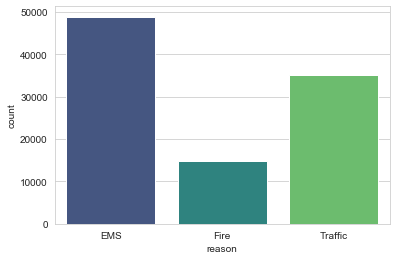

In [17]:
sns.countplot(df['reason'], palette='viridis')

___
Let's deal with the time information we have. Checking the datatype of the timestamp column.

In [18]:
type(df['timeStamp'][0])

str

As the timestamps are still string types, it'll make our life easier if we convert it to a python DateTime object, so we can extract the year, month, and day information more intuitively.

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98942 entries, 0 to 98941
Data columns (total 10 columns):
lat          98942 non-null float64
lng          98942 non-null float64
desc         98942 non-null object
zip          98942 non-null float64
title        98942 non-null object
timeStamp    98942 non-null datetime64[ns]
twp          98942 non-null object
addr         98942 non-null object
e            98942 non-null int64
reason       98942 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.5+ MB


In [21]:
time = df['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


Now let's create new features for the above pieces of information.

In [22]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [23]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

The Day of the Week is an integer and it might not be instantly clear which number refers to which Day. We can map that information to a Mon-Sun string.

In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
df['day of week'] = df['day of week'].map(dmap)

In [26]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


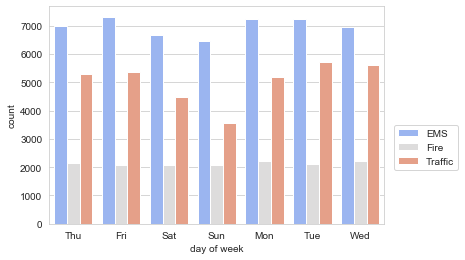

In [27]:
sns.countplot(df['day of week'], hue=df['reason'], palette='coolwarm')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5), borderaxespad=1.)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It makes sense for the number of traffic related 911 calls to be the lowest during the weekends, what's also iteresting is that Emergency Service related calls are also low during the weekend.

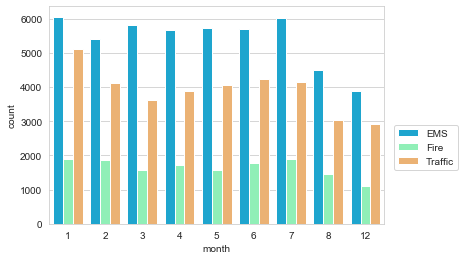

In [28]:
sns.countplot(x='month', data=df, hue='reason', palette='rainbow')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5), borderaxespad=1.)

Now, let's check out the relationship between the number of calls and the month.

In [29]:
bymonth = df.groupby('month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13094,13094,13094,13094,13094,13094,13094,13094,13094,13094,13094,13094
2,11395,11395,11395,11395,11395,11395,11395,11395,11395,11395,11395,11395
3,11052,11052,11052,11052,11052,11052,11052,11052,11052,11052,11052,11052
4,11280,11280,11280,11280,11280,11280,11280,11280,11280,11280,11280,11280
5,11375,11375,11375,11375,11375,11375,11375,11375,11375,11375,11375,11375
6,11726,11726,11726,11726,11726,11726,11726,11726,11726,11726,11726,11726
7,12086,12086,12086,12086,12086,12086,12086,12086,12086,12086,12086,12086
8,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023
12,7911,7911,7911,7911,7911,7911,7911,7911,7911,7911,7911,7911


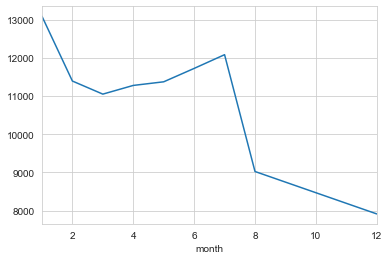

In [30]:
bymonth['lat'].plot()

Using seaborn, let's fit the number of calls to a month and see if there's any concrete correlation between the two.

Text(-7.074999999999996, 0.5, 'Township')

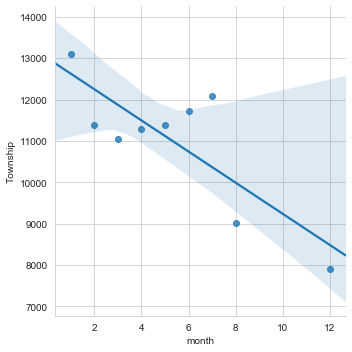

In [31]:
sns.lmplot(x='month', y='twp', data=bymonth.reset_index())
plt.ylabel('Township')

So, it does seem that there are fewer emergency calls during the holiday seasons.

Let's extract the date from the timestamp, and see behavior in a little more detail.

In [32]:
df['date'] = df['timeStamp'].apply(lambda dt: dt.date())

In [33]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


In [34]:
bydate = df.groupby('date').count()
bydate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,113,113,113,113,113,113,113,113,113,113,113,113,113
2015-12-11,391,391,391,391,391,391,391,391,391,391,391,391,391
2015-12-12,401,401,401,401,401,401,401,401,401,401,401,401,401
2015-12-13,317,317,317,317,317,317,317,317,317,317,317,317,317
2015-12-14,444,444,444,444,444,444,444,444,444,444,444,444,444


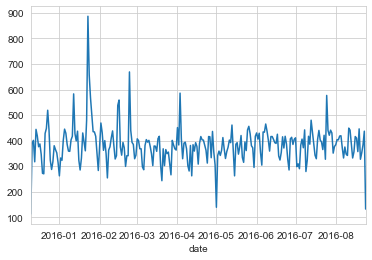

In [35]:
bydate['twp'].plot()

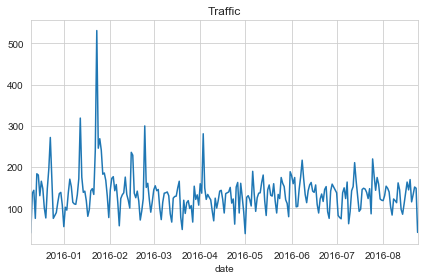

In [36]:
traff = df[df['reason'] == 'Traffic'].groupby('date').count()
traff['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

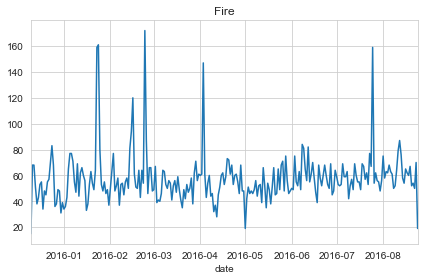

In [37]:
traff = df[df['reason'] == 'Fire'].groupby('date').count()
traff['twp'].plot()
plt.title('Fire')
plt.tight_layout()

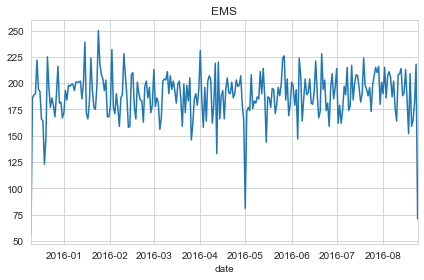

In [38]:
traff = df[df['reason'] == 'EMS'].groupby('date').count()
traff['twp'].plot()
plt.title('EMS')
plt.tight_layout()

___

Let's create a heatmap for the counts of calls on each hour, during a given day of the week.

In [39]:
dayhour = df.groupby(by=['day of week', 'hour']).count()['reason'].unstack()
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,232,191,175,201,194,369,593,737,748,...,925,976,1038,971,817,693,666,553,513,469
Mon,282,220,201,194,203,267,397,650,818,785,...,864,907,985,992,880,742,610,494,468,324
Sat,369,300,262,258,224,231,257,390,458,634,...,784,789,837,752,775,690,623,565,499,464
Sun,381,302,284,266,241,240,298,401,482,618,...,682,691,661,712,665,653,534,459,415,330
Thu,278,202,230,159,182,203,362,568,773,824,...,872,962,933,1006,808,694,614,550,424,354
Tue,269,240,186,170,209,239,412,652,883,870,...,934,933,1016,1011,900,722,646,564,460,273
Wed,248,216,188,207,155,254,408,692,872,805,...,895,862,982,1024,891,682,662,571,485,334


In [40]:
daymonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
daymonth

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1955,1566,1517,1948,1720,1644,2040,1306,1060
Mon,1717,1958,1529,1593,1775,1611,1689,1499,1252
Sat,2247,1434,1261,1729,1440,1378,1692,1087,960
Sun,1951,1223,1097,1487,1418,1329,1665,1016,904
Thu,1578,1583,1889,1591,1586,2055,1643,1224,1257
Tue,1960,1745,1874,1422,1903,1666,1648,1604,1231
Wed,1686,1886,1885,1510,1533,2043,1709,1287,1247


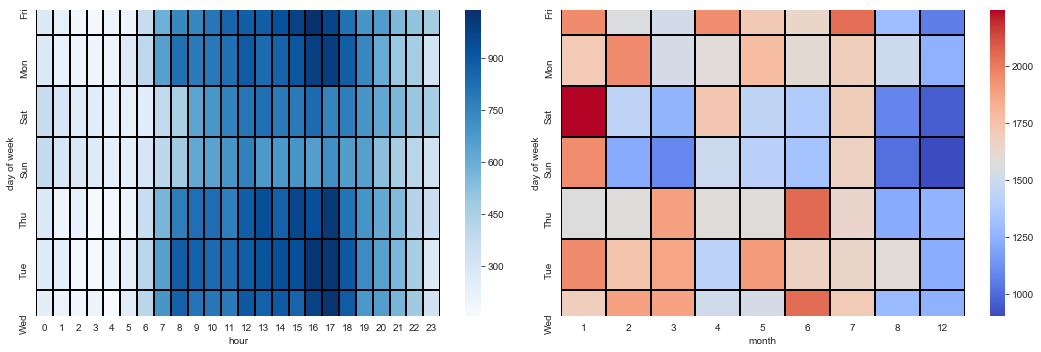

In [41]:
f, axes = plt.subplots(1,2,figsize=[15,5])
sns.heatmap(dayhour, ax=axes[0], cmap='Blues', lw=1, linecolor='black')
sns.heatmap(daymonth, ax=axes[1], cmap='coolwarm', lw=1, linecolor='black')
plt.tight_layout()

We see that most calls take place around the end of office hours on weekdays (side left graph) and we see that most calls take place around the beginning of month on weekdays (side right graph). We can create a clustermap to pair up similar Hours and Month with Days.

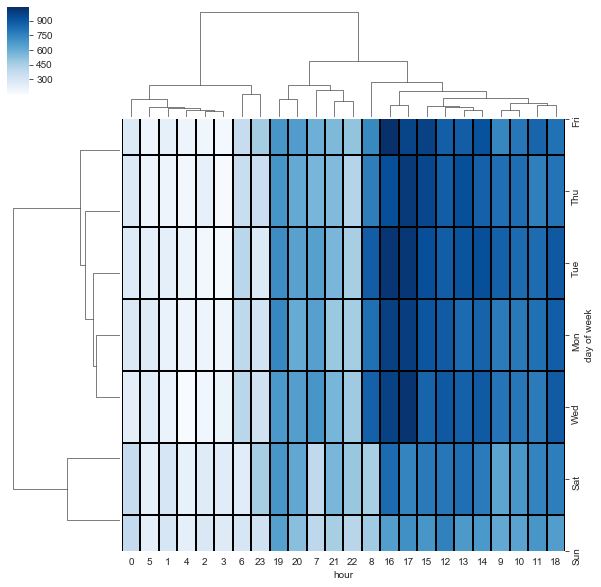

In [42]:
sns.clustermap(dayhour, cmap='Blues', lw=1, linecolor='black')

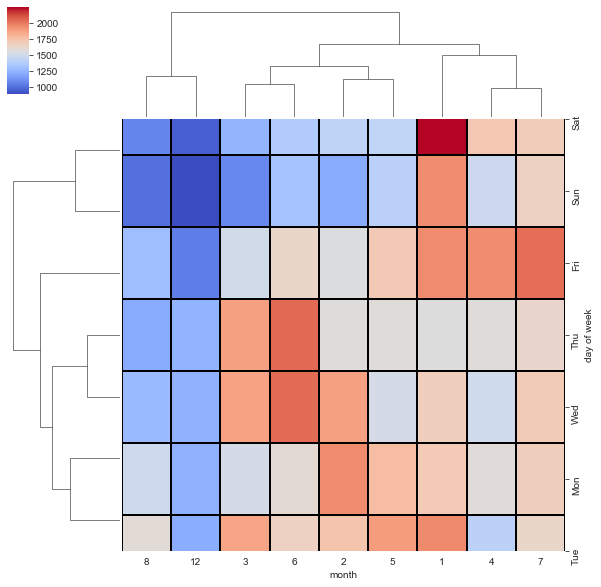

In [43]:
sns.clustermap(daymonth, cmap='coolwarm', lw=1, linecolor='black')

___

In [44]:
dayreason = df.groupby(by=['day of week', 'reason']).count()['hour'].unstack()
dayreason

reason,EMS,Fire,Traffic
day of week,,,
Fri,7313,2087,5356
Mon,7237,2201,5185
Sat,6680,2067,4481
Sun,6451,2074,3565
Thu,6992,2131,5283
Tue,7219,2115,5719
Wed,6961,2219,5606


In [45]:
hourreason = df.groupby(by=['hour', 'reason']).count()['day of week'].unstack()
hourreason

reason,EMS,Fire,Traffic
hour,,,
0,1248,318,536
1,1071,242,399
2,1021,204,317
3,962,205,262
4,944,199,272
5,961,256,411
6,1339,330,834
7,1754,514,1678
8,2284,700,2039


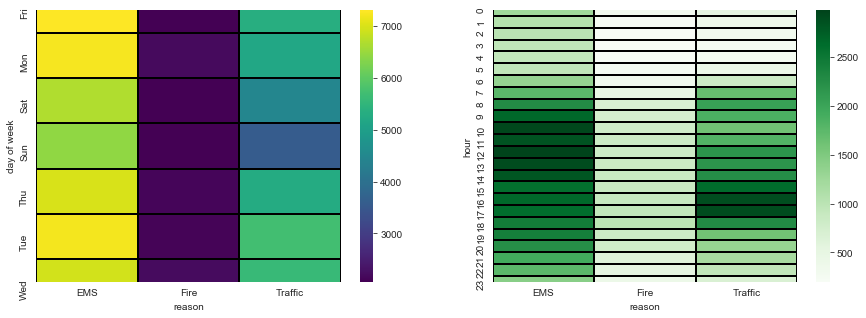

In [46]:
f, axes = plt.subplots(1,2,figsize=[15,5])
sns.heatmap(dayreason, ax=axes[0], cmap='viridis', lw=1, linecolor='black')
sns.heatmap(hourreason, ax=axes[1], cmap='Greens', lw=1, linecolor='black')

<div style="text-align:justify">
We see that most calls take place around Monday, Tuesday, and Friday with EMS reason and the most calls is EMS reason. Then we see that most calls take place around 10 A.M to 14 P.M with EMS reason and around the end of office hours with Traffic reason. We can create a clustermap to pair up similar Hours and Month with Days.
</div>

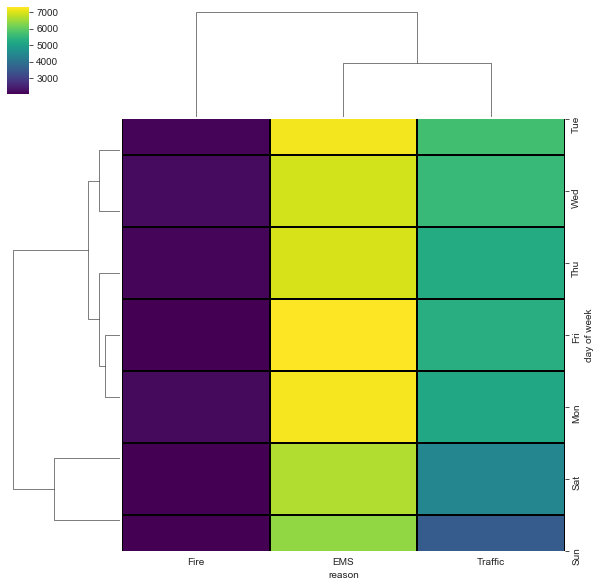

In [47]:
sns.clustermap(dayreason, cmap='viridis', lw=1, linecolor='black')

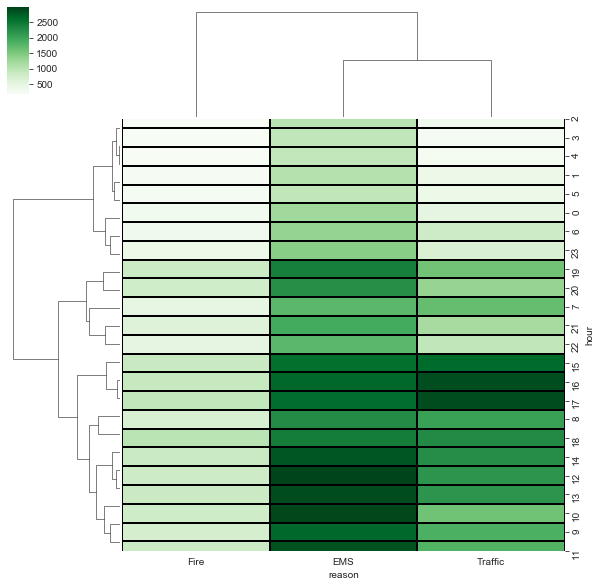

In [48]:
sns.clustermap(hourreason, cmap='Greens', lw=1, linecolor='black')

___

In [49]:
dmap = {'Mon':0, 'Tue':1, 'Wed': 2, 'Thu':3, 'Fri':4, 'Sat':5, 'Sun':6}
df['day of week'] = df['day of week'].map(dmap)

In [50]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10


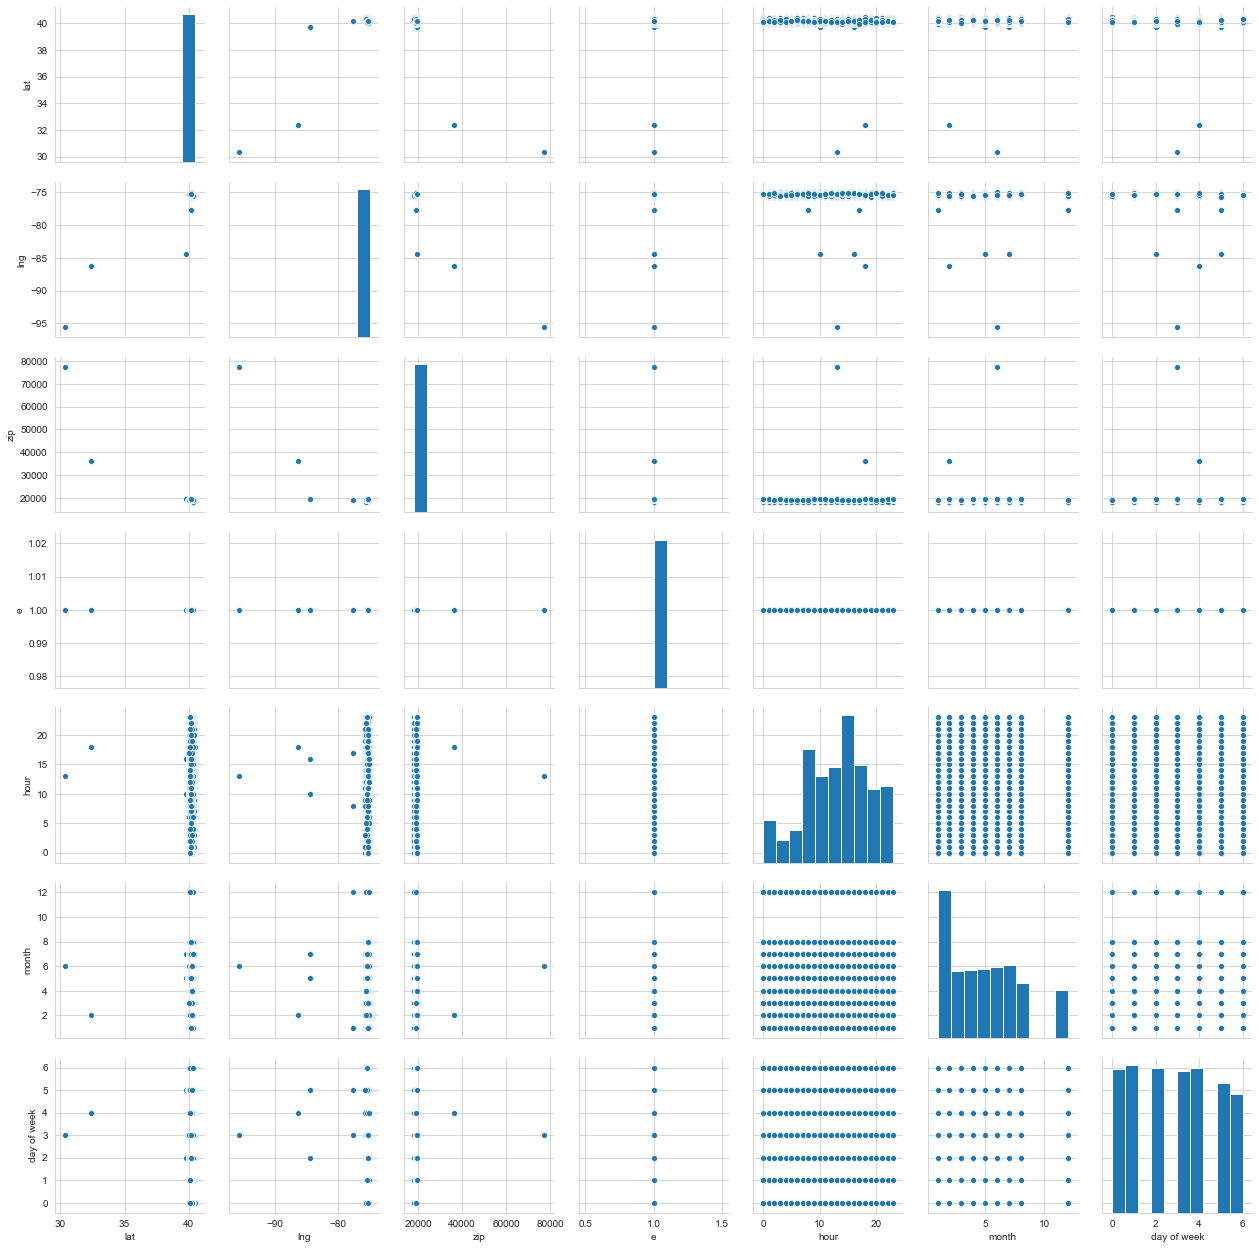

In [51]:
sns.pairplot(df)

In [52]:
df.drop(['desc','title', 'timeStamp','twp', 'addr', 'date'], axis=1, inplace=True)

In [53]:
df.head(3)

,lat,lng,zip,e,reason,hour,month,day of week
0,40.297876,-75.581294,19525.0,1,EMS,17,12,3
1,40.258061,-75.264680,19446.0,1,EMS,17,12,3
2,40.121182,-75.351975,19401.0,1,Fire,17,12,3


In [54]:
from sklearn import preprocessing
reason = preprocessing.LabelEncoder().fit(['EMS','Fire','Traffic'])
df['reason'] = reason.transform(df['reason'])

In [55]:
X = df.drop(['reason'], axis=1)
y = df['reason']

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (69259, 7) (69259,)
Test set:  (29683, 7) (29683,)


In [57]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression().fit(X_train, y_train)
logis

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pred_log = logis.predict(X_test)
pred_log[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Evaluation
We can check precision,recall,f1-score using classification report!

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66     14619
           1       0.00      0.00      0.00      4543
           2       0.28      0.00      0.00     10521

    accuracy                           0.49     29683
   macro avg       0.26      0.33      0.22     29683
weighted avg       0.34      0.49      0.33     29683



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Building K Nearest Neighbors Model
### Standard Scale and Train Test Split

In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X)
scale_feat = scale.transform(X)

In [61]:
df_feat = pd.DataFrame(scale_feat, columns=X.columns)
df_feat.head(3)

,lat,lng,zip,e,hour,month,day of week
0,1.468265,-1.522166,0.889662,0.0,0.685065,2.330941,0.058032
1,1.046334,0.302053,0.645062,0.0,0.685065,2.330941,0.058032
2,-0.404236,-0.200913,0.505733,0.0,0.685065,2.330941,0.058032


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (69259, 7) (69259,)
Test set:  (29683, 7) (29683,)


### K Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
pred_knn = knn.predict(X_test)
pred_knn[0:5]

array([0, 2, 2, 2, 0])

### Evaluation

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.54      0.53      0.54     14619
           1       0.17      0.17      0.17      4543
           2       0.44      0.45      0.45     10521

    accuracy                           0.45     29683
   macro avg       0.38      0.39      0.38     29683
weighted avg       0.45      0.45      0.45     29683



In [66]:
print(confusion_matrix(y_test, pred_knn))

[[7738 2330 4551]
 [2279  784 1480]
 [4250 1496 4775]]


### Choosing a K value

In [67]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

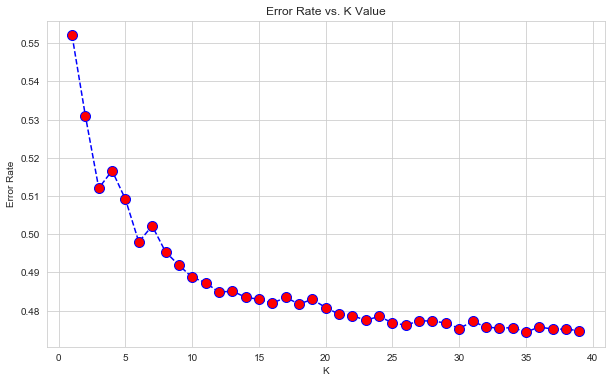

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
# COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=1


[[7738 2330 4551]
 [2279  784 1480]
 [4250 1496 4775]]


              precision    recall  f1-score   support

           0       0.54      0.53      0.54     14619
           1       0.17      0.17      0.17      4543
           2       0.44      0.45      0.45     10521

    accuracy                           0.45     29683
   macro avg       0.38      0.39      0.38     29683
weighted avg       0.45      0.45      0.45     29683



In [70]:
# NOW WITH K=35
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=35


[[11239    33  3347]
 [ 3135    30  1378]
 [ 6165    23  4333]]


              precision    recall  f1-score   support

           0       0.55      0.77      0.64     14619
           1       0.35      0.01      0.01      4543
           2       0.48      0.41      0.44     10521

    accuracy                           0.53     29683
   macro avg       0.46      0.40      0.36     29683
weighted avg       0.49      0.53      0.47     29683



In [72]:
from sklearn import metrics
Ks = 41
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.44796685, 0.46905636, 0.48795607, 0.48337432, 0.49088704,
       0.5020382 , 0.49782704, 0.50463228, 0.50813597, 0.51130277,
       0.51268403, 0.51521073, 0.51490752, 0.51652461, 0.51706364,
       0.51807432, 0.51659199, 0.51827645, 0.51709733, 0.51921976,
       0.5209716 , 0.52134218, 0.522555  , 0.52154432, 0.52322878,
       0.52383519, 0.52268976, 0.52275713, 0.52326247, 0.52471111,
       0.5228582 , 0.52430684, 0.52464374, 0.52447529, 0.52562073,
       0.52434053, 0.52484587, 0.52491325, 0.52525014, 0.5250817 ])

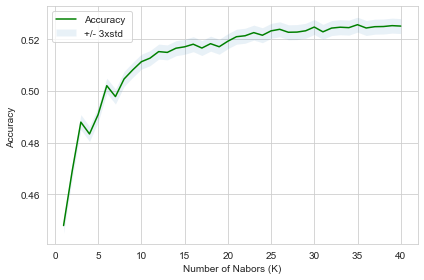

In [73]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

## Building Decision Tree Model
### Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (69259, 7) (69259,)
Test set:  (29683, 7) (29683,)


### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
predict_tree = tree.predict(X_test)
predict_tree[0:5]

array([0, 0, 0, 2, 0])

### Evaluation

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predict_tree))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67     14619
           1       0.37      0.03      0.06      4543
           2       0.55      0.39      0.45     10521

    accuracy                           0.55     29683
   macro avg       0.49      0.42      0.39     29683
weighted avg       0.53      0.55      0.50     29683



In [78]:
print(confusion_matrix(y_test, predict_tree))

[[12185   173  2261]
 [ 3271   147  1125]
 [ 6360    77  4084]]


## Building Random Forest Model
### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (69259, 7) (69259,)
Test set:  (29683, 7) (29683,)


### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=30).fit(X_train, y_train)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
pred_rfc = rfc.predict(X_test)
pred_rfc[0:5]

array([0, 0, 2, 2, 0])

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67     14619
           1       0.24      0.09      0.14      4543
           2       0.58      0.56      0.57     10521

    accuracy                           0.58     29683
   macro avg       0.48      0.47      0.46     29683
weighted avg       0.54      0.58      0.55     29683



In [83]:
print(confusion_matrix(y_test, pred_rfc))

[[10820   836  2963]
 [ 2729   428  1386]
 [ 4059   526  5936]]


## Building Support Vector Machine Model
### Train Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (69259, 7) (69259,)
Test set:  (29683, 7) (29683,)


### SVM

In [85]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train, y_train)
svm_model

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
pred_svm = svm_model.predict(X_test)
pred_svm[0:5]

array([0, 2, 2, 2, 0])

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64     14619
           1       0.31      0.01      0.02      4543
           2       0.48      0.42      0.45     10521

    accuracy                           0.52     29683
   macro avg       0.45      0.40      0.37     29683
weighted avg       0.49      0.52      0.47     29683



In [88]:
print(confusion_matrix(y_test, pred_svm))

[[11133    50  3436]
 [ 3088    38  1417]
 [ 6080    34  4407]]
